1.660538921e-24
time taken is 8.8291 seconds
time taken is 0.0169 seconds


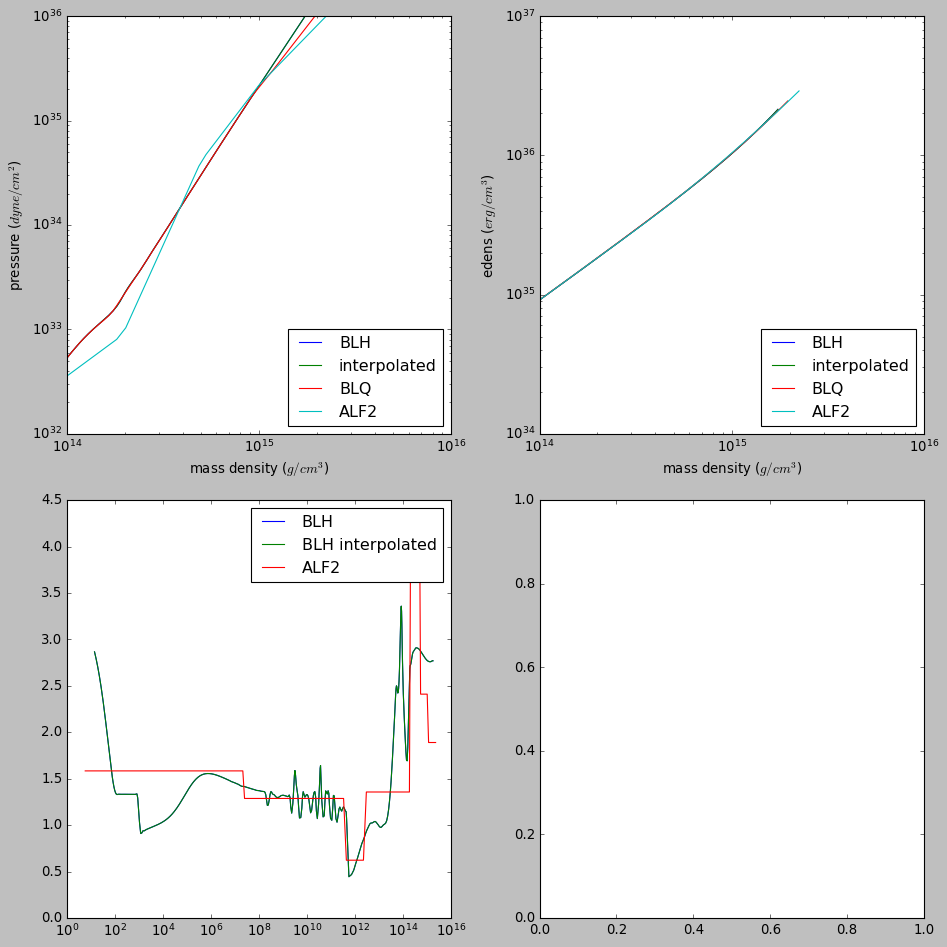

In [121]:
#blh=np.loadtxt('./eos_tables/sfho+BL_01-Apr-2019.lorene',comments='#')
blh=np.loadtxt('./eos_tables/BLH_new_14-Apr-2020.lorene',comments='#')
blq=np.loadtxt('./eos_tables/BLQ_gibbs_180_10-Mar-2020.lorene',comments='#',skiprows=8)
alf2=np.loadtxt('./eos_tables/ALF2_data.out',comments='#')

#print(ds[:,1])
rho, edens, p = (blh[:,1],blh[:,2],blh[:,3])
print(const.CGS_AMU)
fm=1.e-13 #1femotometer in cm
dens_conversion=const.CGS_AMU/(fm**3)
edens_conversion=const.CGS_C**2

p_new=np.logspace(14,36,500)


tic = time.perf_counter()


for p in p_new:
    rho_new,edens_new,gamma_new=eos_from_pres(p_new,'./eos_tables/BLQ_gibbs_180_10-Mar-2020.lorene')

toc = time.perf_counter() 

print(f"time taken is {toc - tic:0.4f} seconds")

tic = time.perf_counter()

rho_new,edens_new,gamma_new=eos_from_pres(p_new,'./eos_tables/BLQ_gibbs_180_10-Mar-2020.lorene')
toc = time.perf_counter() 

print(f"time taken is {toc - tic:0.4f} seconds")



key='BLQ'
rho_new,edens_new,gamma_new=eos_from_pres(p_new,'./eos_tables/BLQ_gibbs_180_10-Mar-2020.lorene') #returns in cgs
index=np.array([int(i) for i in range(len(p_new))])
np.savetxt(f'./eos_tables/{key}_data.out',np.c_[index, rho_new/dens_conversion, edens_new/edens_conversion, p_new, gamma_new],header='\n#i rho edens pres gamma',comments=f'#density, pressure and energy density in cgs units for eos={key}.\n')

key='BLH'
rho_new,edens_new,gamma_new=eos_from_pres(p_new,'./eos_tables/BLH_new_14-Apr-2020.lorene') #returns in cgs
index=np.array([int(i) for i in range(len(p_new))])
np.savetxt(f'./eos_tables/{key}_data.out',np.c_[index, rho_new/dens_conversion, edens_new/edens_conversion, p_new, gamma_new],header='\n#i rho edens pres gamma',comments=f'#density, pressure and energy density in cgs units for eos={key}.\n')




blh=np.loadtxt('./eos_tables/BLH_data.out',comments='#')
blq=np.loadtxt('./eos_tables/BLQ_data.out',comments='#')
               
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2,figsize=(12,12))
ax1.plot(blh[:,1]*dens_conversion,blh[:,3],label='BLH')
ax1.plot(rho_new,p_new,label='interpolated')
ax1.plot(blq[:,1]*dens_conversion,blq[:,3],label='BLQ')
ax1.plot(alf2[:,1]*dens_conversion,alf2[:,3],label='ALF2')
ax1.set_xlim([1.e14,1.e16])
ax1.set_ylim([1.e32,1.e36])
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set(xlabel=r'mass density ($g/cm^{3}$)',ylabel=r'pressure ($dyne/cm^2$)')
ax1.legend(loc=4)

ax2.plot(blh[:,1]*dens_conversion,blh[:,2]*edens_conversion,label='BLH')
ax2.plot(rho_new,edens_new,label='interpolated')
ax2.plot(blq[:,1]*dens_conversion,blq[:,2]*edens_conversion,label='BLQ')
ax2.plot(alf2[:,1]*dens_conversion,alf2[:,2]*edens_conversion,label='ALF2')
ax2.set_xlim([1.e14,1.e16])
ax2.set_ylim([1.e34,1.e37])
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set(xlabel=r'mass density ($g/cm^{3}$)',ylabel=r'edens ($erg/cm^{3}$)')
ax2.legend(loc=4)

ax3.plot(rho_new,gamma_new,label='BLH')
ax3.plot(blh[:,1]*dens_conversion,blh[:,4],label='BLH interpolated')
ax3.plot(alf2[:,1]*dens_conversion,alf2[:,4],label='ALF2')
ax3.set_xscale('log')
ax3.legend()

plt.tight_layout()
#plt.savefig('eos_plots_phase.png',dpi=150)

plt.show()


[[2.00000000e+00 1.66353802e+00 1.42325529e+00 1.24751440e+00
  1.11053889e+00 9.98290986e-01 9.06967371e-01 8.31355758e-01
  7.67231265e-01 7.11907115e-01 6.64041986e-01 6.22401117e-01
  5.85874874e-01 5.53478744e-01 5.24353340e-01 4.97937132e-01
  4.74017834e-01 4.52317187e-01 4.32575284e-01 4.14551162e-01
  3.98022801e-01 3.82787125e-01 3.68659999e-01 3.55476235e-01
  3.43142473e-01 3.31622931e-01 3.20852287e-01 3.10768750e-01
  3.01314067e-01 2.92433522e-01 2.84075935e-01 2.76193663e-01
  2.68742602e-01 2.61682184e-01 2.54975379e-01 2.48588692e-01
  2.42498649e-01 2.36696504e-01 2.31164884e-01 2.25886867e-01
  2.20846400e-01 2.16028304e-01 2.11418271e-01 2.07002863e-01
  2.02769517e-01 1.98706537e-01 1.94803102e-01 1.91049261e-01
  1.87435935e-01 1.83954918e-01 1.80599083e-01 1.77362768e-01
  1.74240210e-01 1.71225834e-01 1.68314317e-01 1.65500582e-01
  1.62779800e-01 1.60147389e-01 1.57599018e-01 1.55130601e-01
  1.52738301e-01 1.50418530e-01 1.48167946e-01 1.45983455e-01
  1.4386

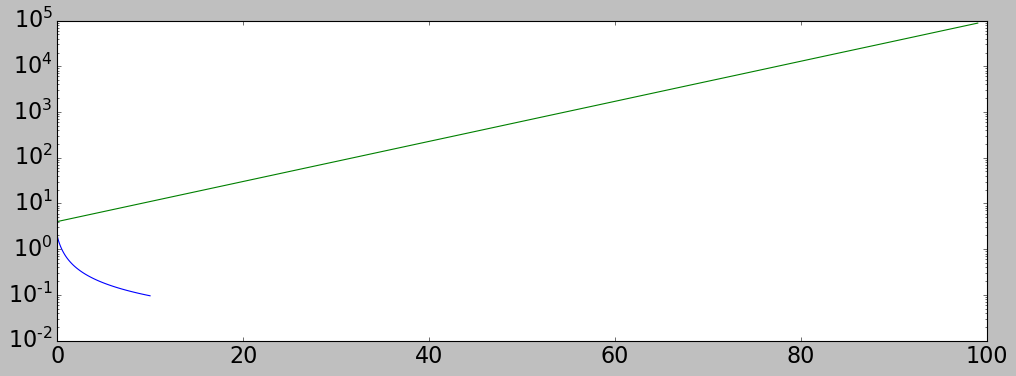

In [100]:
from scipy.integrate import solve_ivp
def exponential_decay(t, y): return -0.5 * y

def shm(t,y): 
    return [-y[0]**2,y[1]]

t_eval=np.linspace(0,10,100)
#sol = solve_ivp(exponential_decay, [0, 10], [2])
sol = solve_ivp(shm, [0, 10], [2,4],method='RK45',t_eval=t_eval)
#print(sol.t)


print(sol.y)

plt.plot(sol.t,sol.y[0],sol.y[1])
plt.yscale('log')
plt.show()

In [65]:
#m_arr,r_arr,rhoc_arr,mb_arr,yp_arr=mass_radius()
ind=190
#print('m_arr = \n',m_arr[0:ind])
#print('r_arr = \n',len(r_arr[0:ind]),r_arr[0:ind])
#print('yp_arr = \n',yp_arr[0:ind])
#np.save('./eos_tables/BLH',[m_arr[0:ind],r_arr[0:ind],rhoc_arr[0:ind],mb_arr[0:ind],yp_arr[0:ind]])
#np.savetxt(f'./eos_tables/BLH_M_R_Mb_Lam.out',np.c_[m_arr[0:ind],r_arr[0:ind],rhoc_arr[0:ind],mb_arr[0:ind],yp_arr[0:ind]],header='#Mass Radius Baryonic_Mass Lambda \n',comments=f'#Mass(in solar mass), Radius(km), BaryonicMass(solar mass), Lambda(dimensional).\n')
blh_data=np.load('./eos_tables/BLH.npy',allow_pickle=True) 
print(len(blh_data[2]))

147


In [ ]:
blq=np.load('../EOS_data/BLQ')
np.savetxt(f'../EOS_Data/BLQ_M_R_Mb_Lam.out',np.c_[m_arr[0:ind],r_arr[0:ind],rhoc_arr[0:ind],mb_arr[0:ind],yp_arr[0:ind]],header='#Mass Radius Baryonic_Mass Lambda \n',comments=f'#Mass(in solar mass), Radius(km), BaryonicMass(solar mass), Lambda(dimensional).\n')


length of mass-radius points=200 in eos=BLQ
length of mass-radius points=291 in eos=ALF2
length of mass-radius points=147 in eos=BLH


ValueError: x and y must have same first dimension, but have shapes (100,) and (147,)

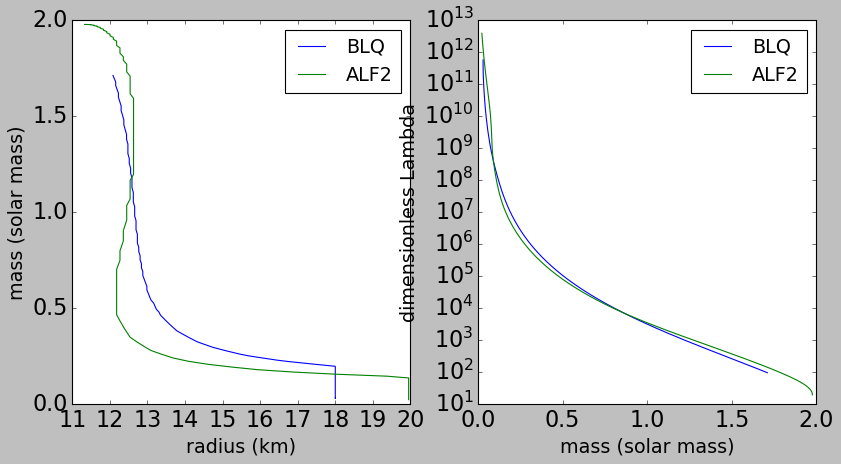

In [110]:
data_path='./m_mB_rad_data'
#data_path='../data/m_mB_rad_data'
#eos_list=['MS1','APR3','APR4','DD2','SLy','ALF2','BLQ']
eos_list=['BLQ','ALF2','BLH']

fig,((ax1,ax2))=plt.subplots(nrows=1,ncols=2,figsize=(12,6))
for eos in eos_list:
    ds=np.load(f'{data_path}/%s.npy'%eos,allow_pickle=True) #0:mass(msun), 1:radius(km), 2:rhoc(cgs), 4:lambda (in cgs)

    print(f'length of mass-radius points={len(ds[4])} in eos={eos}')
    #print(max(ds[0]))
    ax1.plot(ds[1],ds[0],label=eos)
    #ax1.plot(ds[1],ds[3],ls='--',label='mBaryonic')
    ax1.set(xlabel='radius (km)',ylabel='mass (solar mass)')
    ax1.legend()
    #plt.xlim([0.5,3.0])
    #plt.ylim([10,1.e6])
    #plt.clf()
    ax2.semilogy(ds[0],(ds[4]*const.CGS_G)*((const.CGS_C**2)/(const.CGS_G*ds[0]*const.CGS_MSUN))**5,label=eos)   #(lambda_out*const.CGS_G)*((const.CGS_C**2)/(const.CGS_G*mass_input*const.CGS_MSUN))**5
    ax2.legend()
    ax2.set(xlabel='mass (solar mass)',ylabel='dimensionless Lambda')
plt.xlabel('mass')
plt.ylabel(r'$\Lambda$')
#plt.savefig('blh_blq_mass-radius.png',dpi=150)
plt.show()

r
./matlab_Sebastiano/tov/Sequences/Complete/APR4_sequence.txt
length of mass-radius points=298 in eos=APR4
[18.         18.         18.         18.         18.         18.
 18.         18.         18.         18.         18.         18.
 18.         18.         18.         18.         18.         18.
 18.         18.         18.         18.         18.         18.
 18.         18.         18.         18.         18.         18.
 18.         18.         18.         18.         18.         18.
 18.         18.         18.         18.         18.         18.
 18.         18.         18.         18.         18.         18.
 18.         18.         18.         18.         18.         18.
 18.         18.         18.         18.         18.         18.
 18.         18.         18.         18.         18.         18.
 18.         18.         18.         18.         18.         18.
 18.         18.         18.         18.         18.         18.
 18.         18.         18.         18.       

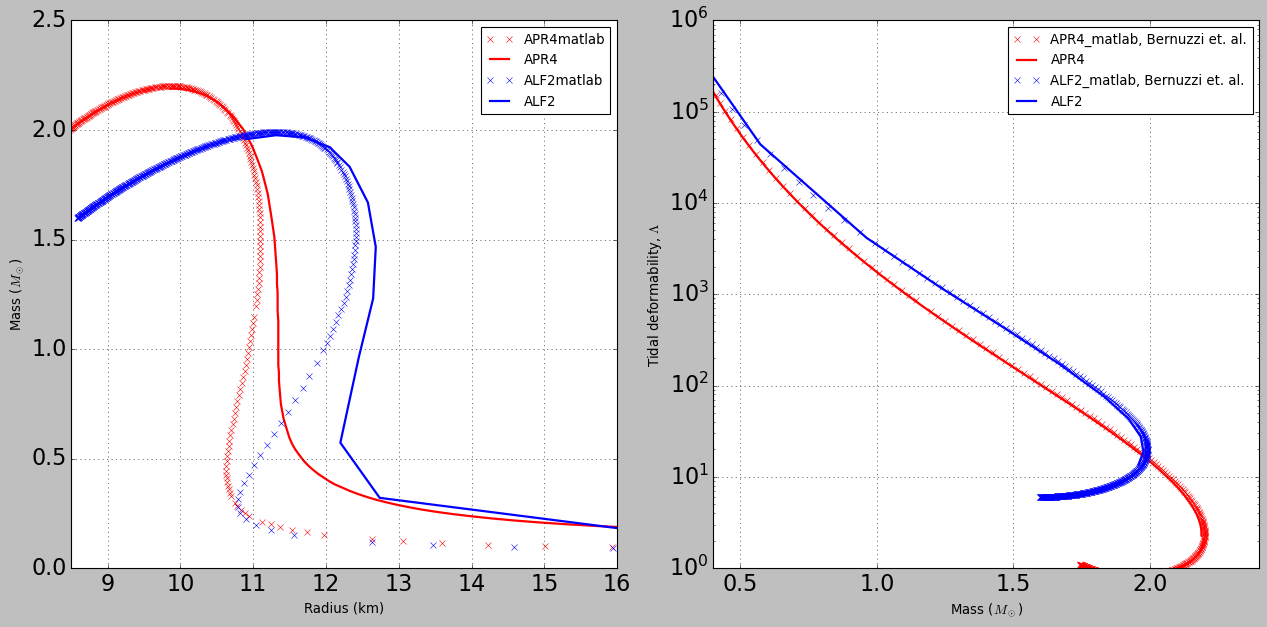

In [127]:
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import numpy as np
    
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':20,
         'ytick.labelsize':20}
pylab.rcParams.update(params)


from cycler import cycler

#eos_data_path='../../../GRMHDResearch/_kilonovae_standardization/codes/src/tov/m_mB_rad_data'

eos_data_path='./m_mB_rad_data'
#data_path='../data/m_mB_rad_data'
#eos_list=['MS1','APR4','DD2','SLy','ALF2','H4'] #'APR3',
eos_list=['APR4','ALF2'] #,'APR3']

#['BLH','BLQ','H4','MPA1','MS1','SLy','WFF1','WFF2',]

#available Matlab sequences: 'MS1','APR4','DD2','SLy','ALF2',H4

sebastiano_data='./matlab_Sebastiano/tov/Sequences/Complete/'



#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(24,16))
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(16,8))
legend_labelsize=12
xy_labelsize=12
custom_cycler = (cycler(color=['r', 'b', 'g', 'k','c','orange'])) #+ cycler(lw=[1, 2, 3, 4]))

#plt.rc('lines', linewidth=4)
#plt.rc('axes', prop_cycle=custom_cycler)

#fig.gca().set_color_cycle(['red', 'green', 'blue', 'yellow'])

#fig.suptitle('M-R relation')
for cc,eos in zip(custom_cycler,eos_list):
    print(cc['color'])
    file=sebastiano_data+eos+'_sequence.txt'  
    print(file)
    ds_matlab=np.loadtxt(file,skiprows=1)
    ax1.plot(ds_matlab[:,3]*const.AGEO_LENGTH_IN_M/1.e3,ds_matlab[:,1],'x',color=cc['color'],label=eos+'matlab')
    
    
    
    ds=np.load(f'{eos_data_path}/%s.npy'%eos) #0:mass(msun), 1:radius(km), 2:rhoc(cgs), 3: baryonic mass, 4:lambda (in cgs)
    print(f'length of mass-radius points={len(ds[4])} in eos={eos}')
    #print(max(ds[0]))
    print(ds[1])
    ax1.plot(ds[1],ds[0],color=cc['color'],lw=2,label=eos)
    #ax1.plot(ds[1],ds[3],color=cc['color'],ls='--',lw=2,label=eos+'M_Baryonic')
    
    
    m_new=np.linspace(0.5,1.9,100)
    C_arr,l_arr,r_arr=Compactness_MBaryon(m_new,eos)
    
    #ax1.plot(r_arr,m_new,'x',label='interpolated '+eos)
    ax1.set_xlabel(r'Radius (km)',fontsize=xy_labelsize)
    ax1.set_ylabel(r'Mass ($M_\odot$)',fontsize=xy_labelsize)
    ax1.set_xlim([8.5,16])
    ax1.legend(fontsize=legend_labelsize)
    ax1.grid(True)

    #ax3.plot(abs(ds[1]-r_arr)/ds[1],ds[0],'.',label=eos)
    #ax3.set(ylabel='mass',xlabel='relative interpolation error in radius')
    #ax3.set_xscale('log')
    #ax3.legend()
    
    ax2.semilogy(ds_matlab[:,1],ds_matlab[:,6],'x',color=cc['color'],label=eos+'_matlab, Bernuzzi et. al.')
    ax2.semilogy(ds[0],(ds[4]*const.CGS_G)*((const.CGS_C**2)/(const.CGS_G*ds[0]*const.CGS_MSUN))**5,color=cc['color'],lw=2,label=eos)   #(lambda_out*const.CGS_G)*((const.CGS_C**2)/(const.CGS_G*mass_input*const.CGS_MSUN))**5
    #ax2.semilogy(ds[0],ds[4],label=eos)
    #ax2.semilogy(m_new,l_arr,'x',label=f'interpolated {eos}')
    ax2.set_xlabel(r'Mass ($M_\odot$)',fontsize=xy_labelsize)
    ax2.set_ylabel(r'Tidal deformability, $\Lambda $',fontsize=xy_labelsize) #(g/cm^2/s^2)
    ax2.set_xlim([0.4,2.4])
    ax2.set_ylim([1,1.e6])
    ax2.legend(fontsize=legend_labelsize)
    ax2.grid(True)
            
    #ax3.plot(ds[0],ds[2],label=eos)
    
    #ax4.plot(ds[0],ds[3],label=eos)
ax1.set_prop_cycle(custom_cycler)
#plt.grid()
plt.tight_layout()
#plt.savefig('./data/m_mB_rad_data/plots/MR_eos.png',dpi=150)
plt.show()


['./matlab_Sebastiano/tov/Sequences/Complete/2B_sequence.txt', './matlab_Sebastiano/tov/Sequences/Complete/2H_sequence.txt', './matlab_Sebastiano/tov/Sequences/Complete/ALF2_sequence.txt', './matlab_Sebastiano/tov/Sequences/Complete/APR4_sequence.txt', './matlab_Sebastiano/tov/Sequences/Complete/BHBlp_sequence.txt', './matlab_Sebastiano/tov/Sequences/Complete/BLh_sequence.txt', './matlab_Sebastiano/tov/Sequences/Complete/DD2_sequence.txt', './matlab_Sebastiano/tov/Sequences/Complete/ENG_sequence.txt', './matlab_Sebastiano/tov/Sequences/Complete/H3_sequence.txt', './matlab_Sebastiano/tov/Sequences/Complete/H4_sequence.txt', './matlab_Sebastiano/tov/Sequences/Complete/HB_sequence.txt', './matlab_Sebastiano/tov/Sequences/Complete/LS200_sequence.txt', './matlab_Sebastiano/tov/Sequences/Complete/MPA1_sequence.txt', './matlab_Sebastiano/tov/Sequences/Complete/MS1b_sequence.txt', './matlab_Sebastiano/tov/Sequences/Complete/MS1_sequence.txt', './matlab_Sebastiano/tov/Sequences/Complete/SFHo_se

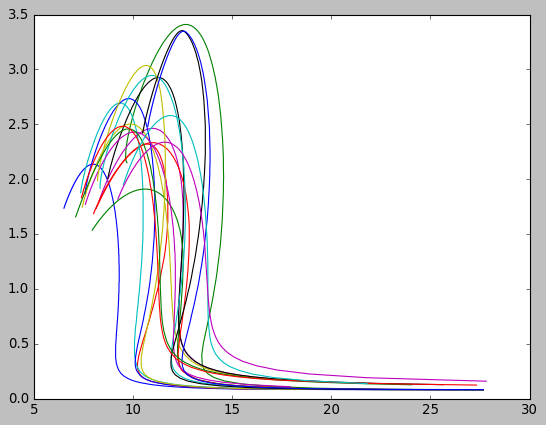

In [5]:
sebastiano_data='./matlab_Sebastiano/tov/Sequences/Complete/'
files=glob.glob(sebastiano_data+'/*txt')
print(files)

for f in files:
    eos=f.split(sebastiano_data)[1].split('.txt')[0].split('_sequence')[0]
    file=sebastiano_data+eos+'_sequence.txt'
    ds=np.loadtxt(file,skiprows=1)
    plt.plot(1.4*ds[:,3],ds[:,2],label=eos)
#plt.legend()
plt.show()